In [111]:
import pandas as pd
import numpy as np


In [112]:
!pip install pytorch_forecasting
!pip install pytorch_lightning

In [113]:
import os 
import warnings

warnings.filterwarnings("ignore") 

In [114]:
import torch
torch.cuda.is_available()
import pandas as pd

In [196]:
data = pd.read_csv('dataset/final_data.csv', delimiter=",")


In [193]:
data = data.rename(columns={'Unnamed: 0': 'time_idx'})

In [197]:
data.head()

,Unnamed: 0,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Treasury_Secretary_Yellen_Speech,United_States_Treasury_Secretary_Yellen_Testimony,United_States_Unemployment_Rate,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI
0,0,2012-04-09 00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13,-,...,-,-,-,-,-,-,-,-,-,-
1,1,2012-04-09 01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12,-,...,-,-,-,-,-,-,-,-,-,-
2,2,2012-04-09 02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12,-,...,-,-,-,-,-,-,-,-,-,-
3,3,2012-04-09 03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13,-,...,-,-,-,-,-,-,-,-,-,-
4,4,2012-04-09 04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12,-,...,-,-,-,-,-,-,-,-,-,-


In [198]:
data.columns

Index(['Unnamed: 0', 'DATE', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'TICKVOL', 'VOL',
       'SPREAD', '10-Year_Note_Auction',
       ...
       'United_States_Treasury_Secretary_Yellen_Speech',
       'United_States_Treasury_Secretary_Yellen_Testimony',
       'United_States_Unemployment_Rate',
       'United_States_Unit_Labour_Costs_QoQ',
       'United_States_Wholesale_Inventories_MoM', 'WASDE_Report',
       'Wages_in_euro_zone', 'World_Economic_Forum_Annual_Meetings',
       'ZEW_Economic_Sentiment', 'procure_ch_PMI'],
      dtype='object', length=566)

In [118]:
# data_columns = ["DATE", "TIME", "OPEN", "HIGH", "LOW", "CLOSE", "TICKVOL", "VOL", "SPREAD"]

In [119]:
# nRows = data.shape[0]
# nCol = len(data_columns)
# new_df = pd.DataFrame(index=range(nRows), columns=data_columns)
# print(new_df.columns)

In [120]:
# from tqdm import tqdm
# def sep_data(data):
#     for idx, dat in tqdm(enumerate(data)):
#         sep = dat[0].split('\t') 
#         for idxx, col in enumerate(data_columns):
#             new_df.iloc[idx].loc[col] = sep[idxx]

In [121]:
# sep_data(data.values)
# assert new_df.shape == (62002,9)

In [122]:
# new_df.shape

In [123]:
# new_df.head()

In [199]:
import matplotlib.pyplot as plt
import numpy as np

In [162]:
np_df = np.array(data)

In [126]:
# new_df.set_index('DATE',inplace=True)


In [127]:
# new_df.head()


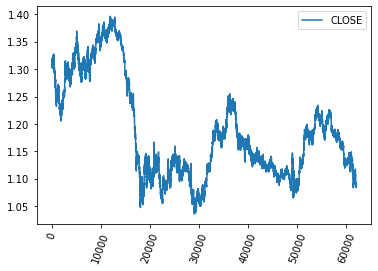

In [163]:
data['CLOSE'].astype(float).plot()
plt.legend()
plt.xticks(rotation = 70);

In [164]:
# import sys
# sys.path.append('C:\\Users\\User\\.conda\\envs\\dsai\\lib\\site-packages') 
# from pytorch_forecasting.data.timeseries import TimeSeriesDataSet

In [165]:
import time
import datetime
# new_df['DATE'] = new_df.index

    

In [131]:
# new_df

In [132]:
# timearr = []
# for date, time_ in zip(new_df['DATE'], new_df['TIME']):
#     datetime__ = date + " " + time_
#     s =  time.mktime(datetime.datetime.strptime(datetime__, "%Y.%m.%d %H:%M:%S").timetuple())
#     timearr.append(s)

In [133]:
# new_df = new_df.reset_index()

In [200]:
data['DATE'] = pd.to_datetime(data['DATE'])

In [340]:
grp = pd.Series(np.ones((len(data))))


In [342]:
data['grp'] = grp
# new_df['grp'] = grp

In [292]:
new_df = data.copy()

In [293]:
new_df = new_df.fillna("-")

In [294]:
new_df["time_idx"] = new_df["DATE"].dt.year * 12 + new_df["DATE"].dt.month
new_df["time_idx"] -= new_df["time_idx"].min()
new_df["month"] = new_df['DATE'].dt.month.astype(str).astype("category")
new_df["year"] = new_df['DATE'].dt.year.astype(str).astype("category")

In [295]:
new_df['year'] = new_df["year"].astype(int)
new_df['month'] = new_df["month"].astype(int)

In [296]:
idx = 0
time_ = []
count = 1
for i in new_df.values:
  
  if count == 24:
    idx = 0
    count = 0
  idx = idx + 1
  count = count + 1

  

In [297]:
time_ = np.arange(len(new_df))
  

In [298]:
len(time_)

62002

In [233]:
time_idx = pd.Series(time_)
new_df['time_idx'] = time_idx

In [145]:
asd = new_df[new_df['DATE'].dt.year == 2012 ]
# print(len(asd[new_df['DATE'].dt.month == 4 ]))
# print(len(asd[new_df['DATE'].dt.month == 5 ]))
# print(len(asd[new_df['DATE'].dt.month == 6 ]))
# print(len(asd[new_df['DATE'].dt.month == 7 ]))
# print(len(asd[new_df['DATE'].dt.month == 8 ]))

new_df[new_df['year'] == 2013]

,time_idx,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI,grp,month,year
4533,4533,2013-01-01 23:00:00,1.32036,1.32192,1.31977,1.32053,1377,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2013
4534,4534,2013-01-02 00:00:00,1.32049,1.32073,1.31866,1.31974,3895,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2013
4535,4535,2013-01-02 01:00:00,1.31972,1.32124,1.31916,1.32065,3601,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2013
4536,4536,2013-01-02 02:00:00,1.32067,1.32767,1.32065,1.32734,7670,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2013
4537,4537,2013-01-02 03:00:00,1.32734,1.32992,1.32706,1.32934,7019,0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,10685,2013-12-31 14:00:00,1.37721,1.37942,1.37684,1.37782,1957,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12,2013
10686,10686,2013-12-31 15:00:00,1.37781,1.37809,1.37664,1.37753,1795,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12,2013
10687,10687,2013-12-31 16:00:00,1.37748,1.37907,1.37636,1.37796,2503,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12,2013
10688,10688,2013-12-31 17:00:00,1.37798,1.37803,1.37644,1.37784,1975,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,12,2013


In [234]:
new_df

,Unnamed: 0,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI,grp,time_idx,month,year
0,0,2012-04-09 00:00:00,1.30961,1.30965,1.30662,1.30687,2151,0,13,-,...,-,-,-,-,-,-,1.0,0,4,2012
1,1,2012-04-09 01:00:00,1.30688,1.30861,1.30668,1.30847,1490,0,12,-,...,-,-,-,-,-,-,1.0,1,4,2012
2,2,2012-04-09 02:00:00,1.30848,1.30876,1.30441,1.30443,2226,0,12,-,...,-,-,-,-,-,-,1.0,2,4,2012
3,3,2012-04-09 03:00:00,1.30444,1.30524,1.30330,1.30508,2322,0,13,-,...,-,-,-,-,-,-,1.0,3,4,2012
4,4,2012-04-09 04:00:00,1.30509,1.30618,1.30504,1.30581,1379,0,12,-,...,-,-,-,-,-,-,1.0,4,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61997,61997,2022-04-08 14:00:00,1.08861,1.08881,1.08592,1.08638,3897,0,0,-,...,-,-,-,-,-,-,1.0,61997,4,2022
61998,61998,2022-04-08 15:00:00,1.08637,1.08660,1.08504,1.08531,4443,0,0,-,...,-,-,-,-,-,-,1.0,61998,4,2022
61999,61999,2022-04-08 16:00:00,1.08531,1.08581,1.08364,1.08399,6250,0,0,-,...,-,-,-,-,-,-,1.0,61999,4,2022
62000,62000,2022-04-08 17:00:00,1.08399,1.08804,1.08388,1.08727,6825,0,0,-,...,-,-,-,-,-,-,1.0,62000,4,2022


In [147]:
# time_idx = pd.Series(arr)
# group = pd.Series(grp_arr)
# new_df["time_idx"] = time_idx
# new_df["group"] = group

In [148]:
# len(new_df[new_df['time_idx'] == 3])

In [149]:
# year_arr = [x.split(".")[0] for x in new_df["DATE"]]
# year_arr = pd.Series(year_arr)

In [150]:
new_df.iloc[100] 

time_idx                                  100
DATE                      2012-04-13 04:00:00
OPEN                                   1.3188
HIGH                                   1.3188
LOW                                   1.31646
                                 ...         
ZEW_Economic_Sentiment                    NaN
procure_ch_PMI                            NaN
grp                                       1.0
month                                       4
year                                     2012
Name: 100, Length: 569, dtype: object

In [299]:
new_df['OPEN'] = new_df["OPEN"].astype(float)
new_df['HIGH'] = new_df["HIGH"].astype(float)
new_df['CLOSE'] = new_df["CLOSE"].astype(float)
new_df['LOW'] = new_df["LOW"].astype(float)
new_df['TICKVOL'] = new_df["TICKVOL"].astype(float)
new_df['VOL'] = new_df["VOL"].astype(float)
new_df['SPREAD'] = new_df["SPREAD"].astype(int)

In [347]:
new_df['grp'] = new_df['grp'].astype("str")

In [214]:
for col in special_days:
    new_df[col] = new_df[col].astype('str')

In [301]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62002 entries, 0 to 62001
Columns: 570 entries, Unnamed: 0 to year
dtypes: datetime64[ns](1), float64(6), int64(5), object(558)
memory usage: 269.6+ MB


In [183]:
import copy
from pathlib import Path
import numpy as np
import pandas as pd

import pytorch_lightning as pl
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
from pytorch_lightning.loggers import TensorBoardLogger

import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer, TimeSeriesDataSet
from pytorch_forecasting.data import GroupNormalizer
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

In [287]:
special_days = new_df.columns[9:-3]
print(len(special_days)) 
# special_days.remove(6)

553


In [308]:
new_df = new_df.drop('time_idx', axis=1)
new_df = new_df.rename({"Unnamed: 0" : "time_idx"}, axis = 1)

In [335]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62002 entries, 0 to 62001
Columns: 569 entries, time_idx to year
dtypes: datetime64[ns](1), float64(6), int64(4), object(558)
memory usage: 269.2+ MB


In [336]:
new_df

,time_idx,DATE,OPEN,HIGH,LOW,CLOSE,TICKVOL,VOL,SPREAD,10-Year_Note_Auction,...,United_States_Unit_Labour_Costs_QoQ,United_States_Wholesale_Inventories_MoM,WASDE_Report,Wages_in_euro_zone,World_Economic_Forum_Annual_Meetings,ZEW_Economic_Sentiment,procure_ch_PMI,grp,month,year
0,0,2012-04-09 00:00:00,1.30961,1.30965,1.30662,1.30687,2151.0,0.0,13,-,...,-,-,-,-,-,-,-,grp_1,4,2012
1,1,2012-04-09 01:00:00,1.30688,1.30861,1.30668,1.30847,1490.0,0.0,12,-,...,-,-,-,-,-,-,-,grp_1,4,2012
2,2,2012-04-09 02:00:00,1.30848,1.30876,1.30441,1.30443,2226.0,0.0,12,-,...,-,-,-,-,-,-,-,grp_1,4,2012
3,3,2012-04-09 03:00:00,1.30444,1.30524,1.30330,1.30508,2322.0,0.0,13,-,...,-,-,-,-,-,-,-,grp_1,4,2012
4,4,2012-04-09 04:00:00,1.30509,1.30618,1.30504,1.30581,1379.0,0.0,12,-,...,-,-,-,-,-,-,-,grp_1,4,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61997,61997,2022-04-08 14:00:00,1.08861,1.08881,1.08592,1.08638,3897.0,0.0,0,-,...,-,-,-,-,-,-,-,grp_1,4,2022
61998,61998,2022-04-08 15:00:00,1.08637,1.08660,1.08504,1.08531,4443.0,0.0,0,-,...,-,-,-,-,-,-,-,grp_1,4,2022
61999,61999,2022-04-08 16:00:00,1.08531,1.08581,1.08364,1.08399,6250.0,0.0,0,-,...,-,-,-,-,-,-,-,grp_1,4,2022
62000,62000,2022-04-08 17:00:00,1.08399,1.08804,1.08388,1.08727,6825.0,0.0,0,-,...,-,-,-,-,-,-,-,grp_1,4,2022


In [302]:
# for idx, col in enumerate(special_days): 
    
#     NaNLabelEncoder().fit( new_df[col].to_numpy().reshape(-1)) 

In [303]:
# from pytorch_forecasting.data.encoders import NaNLabelEncoder
# for idx, col in enumerate(special_days):
#     print(idx, col)
    
#     NaNLabelEncoder().fit( new_df[col].to_numpy().reshape(-1)) 


In [286]:
new_df = new_df.drop(['Core_PCE_Price_Index'], axis=1)

In [356]:
from pytorch_forecasting.data.timeseries import TimeSeriesDataSet
max_prediction_length =  12
max_encoder_length = 24
training_cutoff = new_df["time_idx"].max() - max_prediction_length
    
timeseries = TimeSeriesDataSet(
     new_df,
    time_idx = "time_idx", 
    target = 'CLOSE',
    group_ids = ['grp'],
    min_encoder_length= max_encoder_length // 2,  # keep encoder length long (as it is in the validation set)
    max_encoder_length=max_encoder_length,
    min_prediction_length=1,
    max_prediction_length=max_prediction_length,
    static_categoricals=["grp"],
    add_relative_time_idx=False,
    time_varying_known_reals=["time_idx", "OPEN", "HIGH", "LOW", "TICKVOL", "VOL", "SPREAD"],
    target_normalizer=GroupNormalizer(
        groups=["grp"], transformation="softplus"
    ),
    variable_groups={"special_days": special_days}, 
    time_varying_known_categoricals=["special_days"],
    time_varying_unknown_categoricals=[], 
    add_target_scales=True, 
    add_encoder_length=True,
    time_varying_unknown_reals = ['CLOSE'],
    allow_missing_timesteps=True)

In [312]:
timeseries.get_parameters() 

{'time_idx': 'time_idx',
 'target': 'CLOSE',
 'group_ids': ['grp'],
 'weight': None,
 'max_encoder_length': 24,
 'min_encoder_length': 12,
 'min_prediction_idx': 0,
 'min_prediction_length': 1,
 'max_prediction_length': 12,
 'static_categoricals': ['grp'],
 'static_reals': ['encoder_length', 'CLOSE_center', 'CLOSE_scale'],
 'time_varying_known_categoricals': ['special_days'],
 'time_varying_known_reals': ['time_idx',
  'OPEN',
  'HIGH',
  'LOW',
  'TICKVOL',
  'VOL',
  'SPREAD'],
 'time_varying_unknown_categoricals': [],
 'time_varying_unknown_reals': ['CLOSE'],
 'variable_groups': {'special_days': Index(['ADP_Nonfarm_Employment_Change', 'API_Weekly_Crude_Oil_Stock',
         'API_Weekly_Cushing_Crude_Oil_Stock',
         'Austria_Bank_Austria_Manufacturing_PMI', 'Austria_Unemployment_Rate',
         'Average_Hourly_Earnings', 'Average_Hourly_Earnings_YoY', 'Beige_Book',
         'Belgium_Extraordinary_NATO_Summit',
         'Belgium_NATO_Defence_Ministers_Meeting',
         ...
      

In [ ]:
 
# dataloader = timeseries.to_dataloader(batch_size=4)

In [357]:
timeseries.index

,time_first,time_last,time_diff_to_next,index_start,time,count,group_id,index_end,sequence_length
0,0,62001,1,0,0,62002,0,35,36
1,0,62001,1,1,1,62002,0,36,36
2,0,62001,1,2,2,62002,0,37,36
3,0,62001,1,3,3,62002,0,38,36
4,0,62001,1,4,4,62002,0,39,36
...,...,...,...,...,...,...,...,...,...
62020,0,62001,1,0,0,62002,0,30,31
62021,0,62001,1,0,0,62002,0,31,32
62022,0,62001,1,0,0,62002,0,32,33
62023,0,62001,1,0,0,62002,0,33,34


In [ ]:
# x, y = next(iter(dataloader))
# # print("x =", x)
# # print("\ny =", y)
# # print("\nsizes of x =")
# for key, value in x.items():
#     print(f"\t{key} = {value.size()}")

In [350]:
validation = TimeSeriesDataSet.from_dataset(timeseries, new_df, predict = True, stop_randomization = True)

batch_size = 128
training_dataloader = timeseries.to_dataloader(train=True, batch_size = batch_size, num_workers=0)
val_dataloader = validation.to_dataloader(train=False, batch_size = batch_size*100, num_workers=0)

In [351]:
x, y = next(iter(training_dataloader))
# print("x =", x)
# print("\ny =", y)
# print("\nsizes of x =")
for key, value in x.items():
    print(f"\t{key} = {value.size()}")

	encoder_cat = torch.Size([128, 24, 1])
	encoder_cont = torch.Size([128, 24, 11])
	encoder_target = torch.Size([128, 24])
	encoder_lengths = torch.Size([128])
	decoder_cat = torch.Size([128, 12, 1])
	decoder_cont = torch.Size([128, 12, 11])
	decoder_target = torch.Size([128, 12])
	decoder_lengths = torch.Size([128])
	decoder_time_idx = torch.Size([128, 12])
	groups = torch.Size([128, 1])
	target_scale = torch.Size([128, 2])


In [324]:
for i, batch in training_dataloader:
    print((batch[0].shape))
    print('')
    print(len(i))
    print('')
    print(i.keys())
    print(i['encoder_lengths'].shape)
    print(i['encoder_target'].shape)
    print(i['encoder_cont'].shape)
    print(i['encoder_cat'].shape)
    
    break;

torch.Size([128, 12])

11

dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])
torch.Size([128])
torch.Size([128, 24])
torch.Size([128, 24, 11])
torch.Size([128, 24, 554])


In [ ]:
for x, (y, weight) in iter(val_dataloader):
    print(x)
    break;

{'encoder_cat': tensor([[[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0]]]), 'encoder_cont': tensor([[[ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7304e+00, -1.0606e+00,
          -1.0676e+00, -1.0602e+00, -7.3971e-01, -1.0661e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7305e+00, -1.0660e+00,
          -1.0725e+00, -1.0656e+00, -1.0630e+00, -1.0649e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7305e+00, -1.0652e+00,
          -1.0703e+00, -1.0593e+00, -9.3809e-01, -1.0664e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7306e+00, -1.0663e+00,
          -1.0707e+00, -1.0582e+00, -8.9731e-01, -1.0636

In [352]:
import torch

from pytorch_forecasting import Baseline, TemporalFusionTransformer

actuals = torch.cat([y for x, (y, weight) in iter(val_dataloader)])
baseline_predictions = Baseline().predict(val_dataloader)
torch.Tensor.float(actuals - baseline_predictions).abs().mean().item()

0.0008658270235173404

In [353]:
actuals

tensor([[1.0855, 1.0868, 1.0862, 1.0868, 1.0867, 1.0869, 1.0886, 1.0864, 1.0853,
         1.0840, 1.0873, 1.0876]])

In [354]:
baseline_predictions

tensor([[1.0864, 1.0864, 1.0864, 1.0864, 1.0864, 1.0864, 1.0864, 1.0864, 1.0864,
         1.0864, 1.0864, 1.0864]])

In [363]:
import pytorch_lightning as pl
from pytorch_forecasting.metrics import SMAPE, PoissonLoss, QuantileLoss
from pytorch_forecasting.models.temporal_fusion_transformer.tuning import optimize_hyperparameters

# pl.seed_everything(42)
trainer = pl.Trainer(
gpus=1,  
)

tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=1,
dropout=0.1,
hidden_continuous_size=8,
output_size=7,
loss=QuantileLoss(),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")


GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


AssertionError: group variables in categorical_groups must not be in embedding_sizes.

In [ ]:
res = trainer.tuner.lr_find(
tft,
train_dataloaders=training_dataloader,
    val_dataloaders = val_dataloader,
    max_lr = 10.0,
    min_lr=1e-6,
)


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

Restoring states from the checkpoint path at D:\AIT\2nd Sem\RTML\Group\Forex-Prediction\.lr_find_8056d6ce-fbd0-4f3b-91ca-8983e61303bc.ckpt


suggested learning rate: 0.5495408738576241


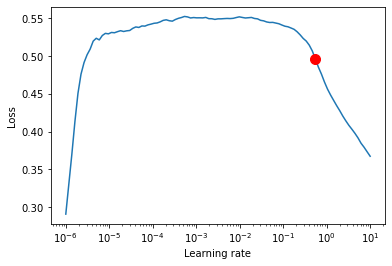

In [ ]:

print(f"suggested learning rate: {res.suggestion()}")
fig = res.plot(show=True, suggest=True)
fig.show()

In [355]:
early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=10, verbose=False, mode="min")
lr_logger = LearningRateMonitor()  # log the learning rate
logger = TensorBoardLogger("lightning_logs")  # logging results to a tensorboard

trainer = pl.Trainer(
    max_epochs=10,
    gpus=1,
    weights_summary="top",
    gradient_clip_val=0.1,
    limit_train_batches=30,  # coment in for training, running valiation every 30 batches
    # fast_dev_run=True,  # comment in to check that networkor dataset has no serious bugs
    callbacks=[lr_logger, early_stop_callback],
    logger=logger,
)


tft = TemporalFusionTransformer.from_dataset(
timeseries,
learning_rate = 0.03,
hidden_size=16,
attention_head_size=1,
dropout=0.1,
hidden_continuous_size=8,
output_size=7,
loss=QuantileLoss(),
reduce_on_plateau_patience=4,
)

print(f"Number of parameters in network: {tft.size()/1e3:.1f}k")

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


AssertionError: categorical_groups must be in embedding_sizes.

In [ ]:
training_dataloader

In [ ]:
 trainer.fit(
    tft,
    train_dataloaders=training_dataloader,
    val_dataloaders=val_dataloader,
)

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

   | Name                               | Type                            | Params
----------------------------------------------------------------------------------------
0  | loss                               | QuantileLoss                    | 0     
1  | logging_metrics                    | ModuleList                      | 0     
2  | input_embeddings                   | MultiEmbedding                  | 1     
3  | prescalers                         | ModuleDict                      | 144   
4  | static_variable_selection          | VariableSelectionNetwork        | 1.8 K 
5  | encoder_variable_selection         | VariableSelectionNetwork        | 3.7 K 
6  | decoder_variable_selection         | VariableSelectionNetwork        | 3.0 K 
7  | static_context_variable_selection  | GatedResidualNetwork            | 1.1 K 
8  | static_context_initial_hidden_lstm | GatedResidualNetwork            | 1.1 K 
9  | static_context_initial_cell_lstm 

Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [ ]:
best_model_path = trainer.checkpoint_callback.best_model_path
best_tft = TemporalFusionTransformer.load_from_checkpoint(best_model_path)

In [ ]:
for x, y in (val_dataloader):
    print(x)

{'encoder_cat': tensor([[[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0]]]), 'encoder_cont': tensor([[[ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7304e+00, -1.0606e+00,
          -1.0676e+00, -1.0602e+00, -7.3971e-01, -1.0661e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7305e+00, -1.0660e+00,
          -1.0725e+00, -1.0656e+00, -1.0630e+00, -1.0649e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7305e+00, -1.0652e+00,
          -1.0703e+00, -1.0593e+00, -9.3809e-01, -1.0664e+00],
         [ 1.0000e+00, -4.4409e-16,  2.7756e-17,  1.7306e+00, -1.0663e+00,
          -1.0707e+00, -1.0582e+00, -8.9731e-01, -1.0636

In [ ]:
actuals = torch.cat([y[0] for x, y in iter(val_dataloader)])
predictions = best_tft.predict(val_dataloader)
(actuals - predictions).abs().mean()

tensor(0.0071)

In [ ]:
actuals

tensor([[1.0859, 1.0864, 1.0855, 1.0868, 1.0862, 1.0868, 1.0867, 1.0869, 1.0886,
         1.0864, 1.0853, 1.0840]])

In [ ]:
predictions

tensor([[1.0922, 1.0926, 1.0929, 1.0931, 1.0935, 1.0937, 1.0937, 1.0937, 1.0938,
         1.0938, 1.0936, 1.0938]])

In [ ]:
# raw predictions are a dictionary from which all kind of information including quantiles can be extracted
raw_predictions, x = best_tft.predict(val_dataloader, mode="raw", return_x=True)

In [ ]:
raw_predictions

{'prediction': tensor([[[1.0687, 1.0835, 1.0882, 1.0922, 1.0960, 1.0979, 1.1057],
          [1.0693, 1.0843, 1.0879, 1.0926, 1.0963, 1.0990, 1.1059],
          [1.0695, 1.0846, 1.0879, 1.0929, 1.0965, 1.0994, 1.1060],
          [1.0697, 1.0848, 1.0880, 1.0931, 1.0966, 1.0995, 1.1061],
          [1.0699, 1.0849, 1.0883, 1.0935, 1.0969, 1.0997, 1.1064],
          [1.0698, 1.0846, 1.0883, 1.0937, 1.0967, 1.0998, 1.1062],
          [1.0701, 1.0849, 1.0884, 1.0937, 1.0971, 1.0999, 1.1065],
          [1.0701, 1.0850, 1.0885, 1.0937, 1.0973, 1.0999, 1.1065],
          [1.0702, 1.0850, 1.0886, 1.0938, 1.0973, 1.0999, 1.1066],
          [1.0701, 1.0850, 1.0885, 1.0938, 1.0973, 1.0998, 1.1065],
          [1.0698, 1.0848, 1.0884, 1.0936, 1.0970, 1.0996, 1.1063],
          [1.0696, 1.0845, 1.0884, 1.0938, 1.0968, 1.0997, 1.1061]]]),
 'attention': tensor([[[[2.7978e-02, 2.8228e-02, 2.9547e-02, 3.0770e-02, 3.2251e-02,
            3.2073e-02, 3.2242e-02, 3.2340e-02, 3.2510e-02, 3.2593e-02,
          

In [ ]:
raw_predictions.keys()

dict_keys(['prediction', 'attention', 'static_variables', 'encoder_variables', 'decoder_variables', 'decoder_lengths', 'encoder_lengths'])

In [ ]:
x.keys()

dict_keys(['encoder_cat', 'encoder_cont', 'encoder_target', 'encoder_lengths', 'decoder_cat', 'decoder_cont', 'decoder_target', 'decoder_lengths', 'decoder_time_idx', 'groups', 'target_scale'])

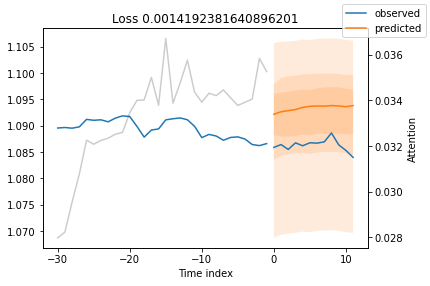

In [ ]:

best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True);

In [ ]:
# best_tft.plot_prediction(x, raw_predictions, idx=0, add_loss_to_title=True);

In [ ]:
# # raw predictions are a dictionary from which all kind of information including quantiles can be extracted
# pred, x = best_tft.predict(val_dataloader, mode="prediction", return_x=True)

# import matplotlib.pyplot as plt

# plt.plot(x['encoder_target'][0][-100:])
# plt.plot(pred[0]); 

In [ ]:
# arr = []

# for i in range(-88, 0):
#   arr.append(i)
# # for i in range(-100, 0):
# #   arr.append(i)

In [ ]:
# arr

In [ ]:
# obs_ = pd.DataFrame(pd.Series(x['encoder_target'][0][-100:-12]), columns=['Observed'])
# pred_ = pd.DataFrame(pd.Series(pred[0]), columns=['Prediction'])

In [ ]:
# obs_['idx'] = arr

In [ ]:
# obs_.set_index('idx', inplace=True)

In [ ]:
# obs_.plot()
# plt.plot(pred_); 


In [ ]:
# # select last 24 months from data (max_encoder_length is 24)
# encoder_data = new_df[lambda x: x.time_idx > x.time_idx.max() - max_encoder_length]

# # select last known data point and create decoder data from it by repeating it and incrementing the month
# # in a real world dataset, we should not just forward fill the covariates but specify them to account
# # for changes in special days and prices (which you absolutely should do but we are too lazy here)
# last_data = new_df[lambda x: x.time_idx == x.time_idx.max()]
# decoder_data = pd.concat(
#     [last_data.assign(date=lambda x: x["DATE"] + pd.offsets.MonthBegin(i)) for i in range(1, max_prediction_length + 1)],
#     ignore_index=True,
# )

# # add time index consistent with "data"
# decoder_data["time_idx"] = decoder_data["DATE"].dt.year * 12 + decoder_data["DATE"].dt.month
# decoder_data["time_idx"] += encoder_data["time_idx"].max() + 1 - decoder_data["time_idx"].min()

# # adjust additional time feature(s)
# decoder_data["month"] = decoder_data.date.dt.month.astype(str).astype("category")  # categories have be strings

# # combine encoder and decoder data
# new_prediction_data = pd.concat([encoder_data, decoder_data], ignore_index=True)

{'attention': <Figure size 432x288 with 1 Axes>,
 'static_variables': <Figure size 504x216 with 1 Axes>,
 'encoder_variables': <Figure size 504x252 with 1 Axes>,
 'decoder_variables': <Figure size 504x234 with 1 Axes>}

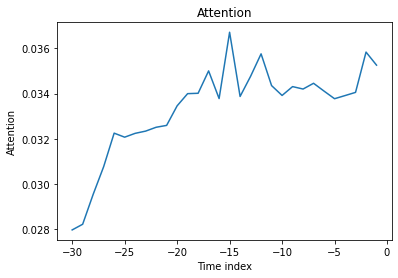

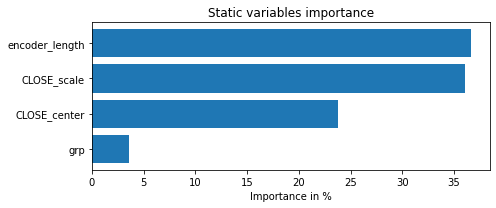

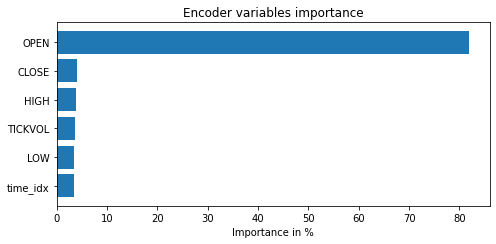

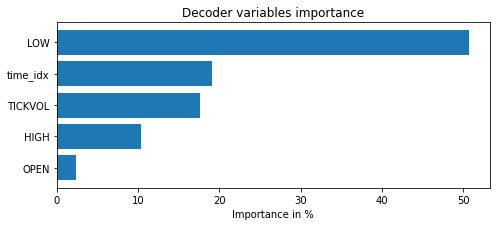

In [ ]:
interpretation = best_tft.interpret_output(raw_predictions, reduction="sum")
best_tft.plot_interpretation(interpretation)